In [4]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import math

In [5]:
# Loading data
dataset = pd.read_csv('finalproj.csv')

In [6]:
#Exploring data
dataset.head()

,V1,V2,V3,V4,Classification
0,-2.25010,3.31290,-0.88369,-2.897400,1
1,0.26637,0.73252,-0.67891,0.035330,1
2,4.79650,6.98590,-1.99670,-0.350010,0
3,0.75736,3.02940,2.91640,-0.068117,0
4,-1.72630,-6.02370,5.24190,0.295240,1


In [7]:
#Statitics of the data 
dataset.describe()

,V1,V2,V3,V4,Classification
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.034653,-1.429995,0.444606
std,2.842763,5.869047,4.336832,2.110059,0.497103
min,-7.042100,-13.773100,-6.261300,-9.048200,0.000000
25%,-1.773000,-1.708200,-1.969525,-2.618650,0.000000
50%,0.496180,2.319650,0.207490,-0.856690,0.000000
75%,2.821475,6.814625,2.935875,0.110653,1.000000
max,6.824800,12.951600,17.677200,2.449500,1.000000


In [8]:
#Summary of N/A Values
dataset.isnull().sum()

V1                0
V2                0
V3                0
V4                0
Classification    0
dtype: int64

In [9]:
#Basic Data Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
V1                1372 non-null float64
V2                1372 non-null float64
V3                1372 non-null float64
V4                1372 non-null float64
Classification    1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


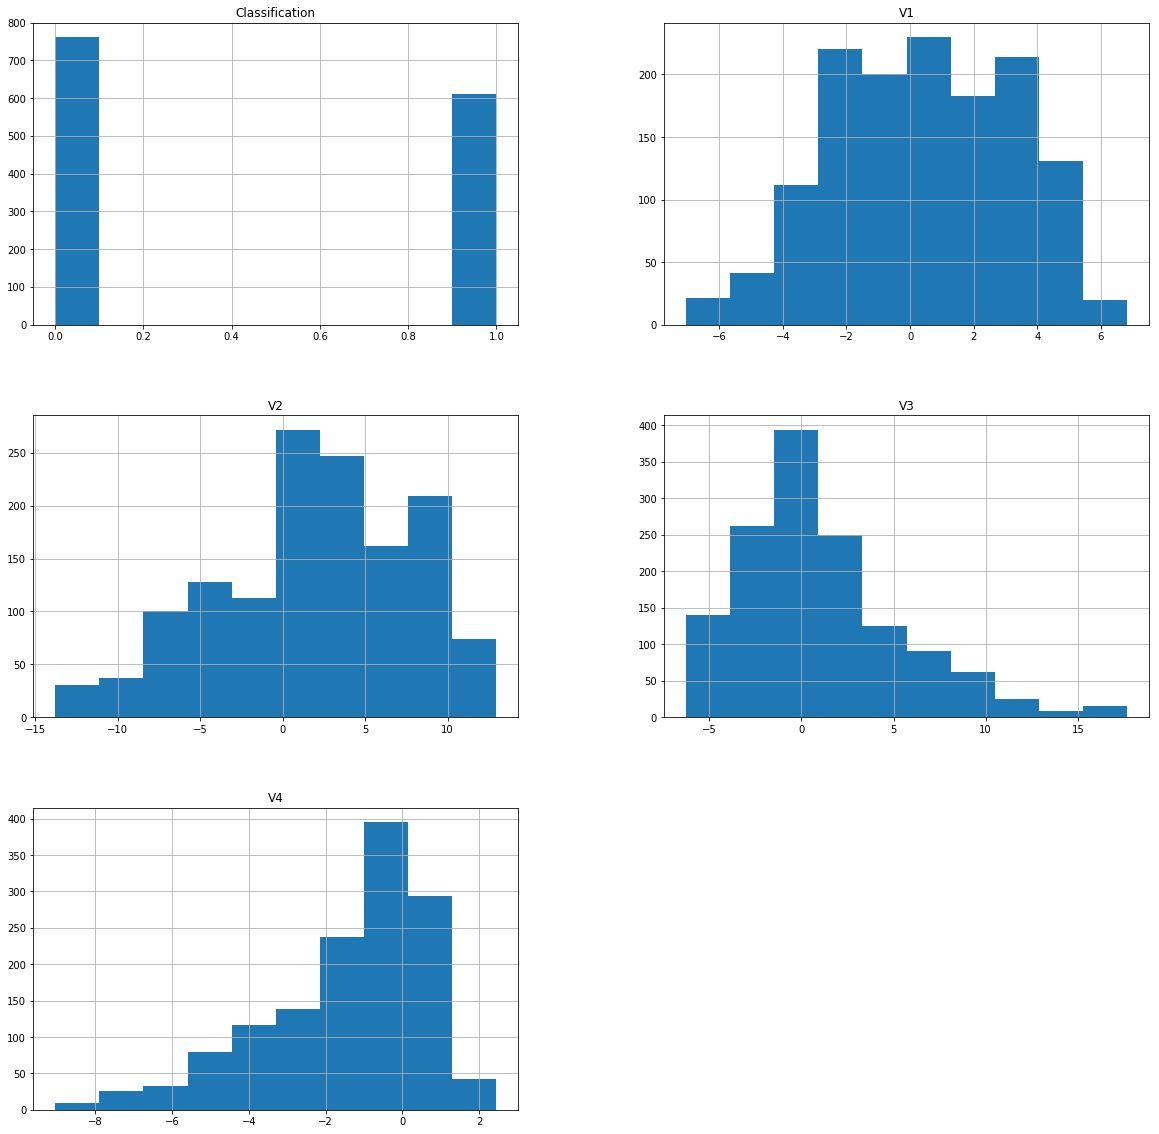

In [10]:
# Plot histograms of each parameter 
dataset.hist(figsize = (20, 20))
plt.show()

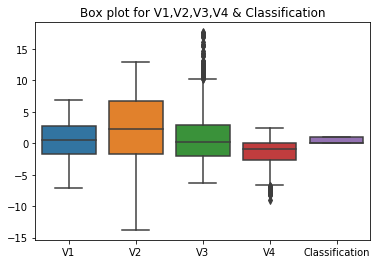

In [11]:
#Boxplot for Features
sns.boxplot(data=dataset)
plt.title('Box plot for V1,V2,V3,V4 & Classification')
plt.show()

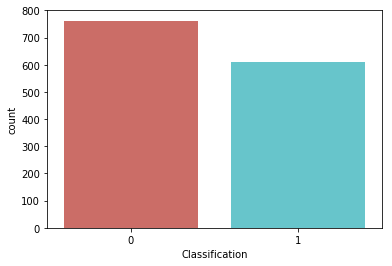

In [12]:
#Checking if the target variable is binary or not
sns.countplot(x='Classification',data=dataset, palette='hls')

In [13]:
# Determine number of fraud cases in dataset

Fraud = dataset[dataset['Classification'] == 1]
Valid = dataset[dataset['Classification'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Activity: {}'.format(len(dataset[dataset['Classification'] == 1])))
print('No Fraud Activity: {}'.format(len(dataset[dataset['Classification'] == 0])))

0.800524934383202
Fraud Activity: 610
No Fraud Activity: 762


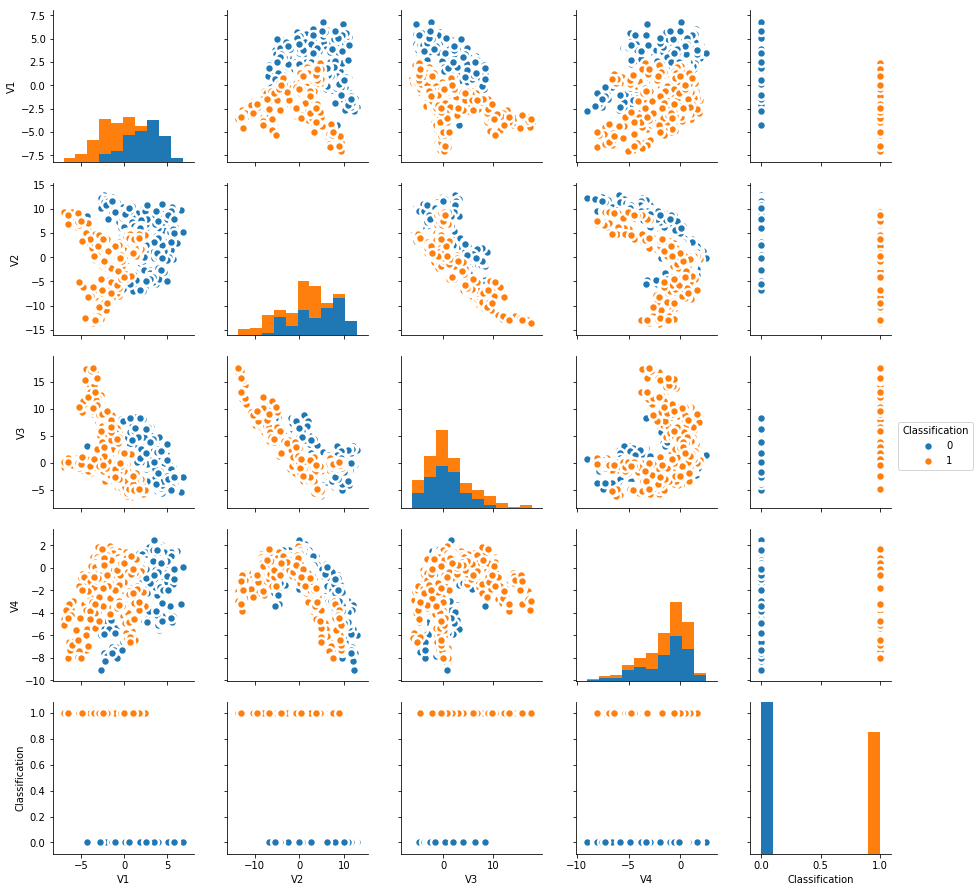

In [14]:
#Correlation Graph
dataframe = pd.DataFrame(dataset,columns=['V1','V2', 'V3','V4','Classification'])

sns.pairplot(dataframe, kind="scatter", hue="Classification", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

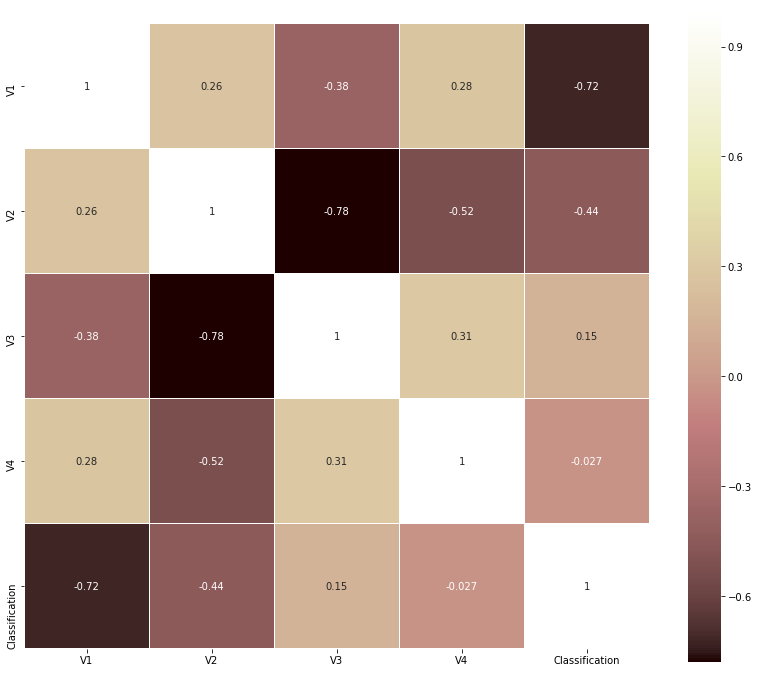

In [39]:
#Visualization of the Correlations
import seaborn as sns
plt.figure(figsize=(14, 12))
sns.heatmap(dataset.corr(),annot=True,cmap="pink",linewidths=0.11,square=True)
plt.show()

In [16]:
#Declaring x and y sets
x = dataset.iloc[: , 0:4].values
y = dataset.iloc[:, 4].values

In [17]:
print("Input Shape : ", x.shape)
print("Output Shape : ", y.shape)

Input Shape :  (1372, 4)
Output Shape :  (1372,)


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_2 = sc.fit_transform(x)

In [19]:
#Spliting the dataset into test and train
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state = 100)

In [20]:
print("xtrain.shape : ", xtrain.shape)
print("xtest.shape  : ", xtest.shape)
print("ytrain.shape : ", ytrain.shape)
print("xtest.shape  : ", xtest.shape)

xtrain.shape :  (1097, 4)
xtest.shape  :  (275, 4)
ytrain.shape :  (1097,)
xtest.shape  :  (275, 4)


In [21]:
#Decision Tree classification
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [22]:
# Predicting 
y_pred_decision_tree = dt_classifier.predict(xtest)

In [23]:
#Evaluating Matrixs
cm_decision = confusion_matrix(ytest, y_pred_decision_tree)
print("confusion Marix : \n", cm_decision)

confusion Marix : 
 [[150   1]
 [  4 120]]


In [24]:
Accuracy_Decison = ((cm_decision[0][0] + cm_decision[1][1]) / cm_decision.sum()) *100
print("Accuracy_Decison    : ", Accuracy_Decison)

Error_rate_Decison = ((cm_decision[0][1] + cm_decision[1][0]) / cm_decision.sum()) *100
print("Error_rate_Decison  : ", Error_rate_Decison)

# True Fake Recognition Rate
Specificity_Decison = (cm_decision[1][1] / (cm_decision[1][1] + cm_decision[0][1])) *100
print("Specificity_Decison : ", Specificity_Decison)

# True Genuine Recognition Rate
Sensitivity_Decison = (cm_decision[0][0] / (cm_decision[0][0] + cm_decision[1][0])) *100
print("Sensitivity_Decison : ", Sensitivity_Decison)

Accuracy_Decison    :  98.18181818181819
Error_rate_Decison  :  1.8181818181818181
Specificity_Decison :  99.17355371900827
Sensitivity_Decison :  97.40259740259741


#Part 2

In [25]:
#Load Library for Training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify=y,random_state= 100)

In [38]:
#Import Model
from sklearn.tree import DecisionTreeClassifier
# Construct some pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
pipe_dt = Pipeline([('scl', StandardScaler()),
                  ('clf', DecisionTreeClassifier(random_state=100))])

In [27]:
#Define Plot for learning curve
from sklearn.model_selection import learning_curve
def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
     X=x_train,
    y=y_train,
    cv=10,
    train_sizes=np.linspace(.1,1,10),
    scoring='accuracy',
    n_jobs=1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean,color='blue', marker='o',
     markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
     alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
     label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
     alpha=0.15, color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.8, 1.01])
    plt.show()


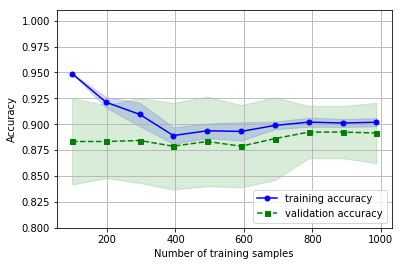

In [28]:
#Plot Learning Curve
plot_learning_curves(pipe_dt)


In [29]:
#Create table to compare MLA metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_colwidth', -1)

In [30]:
# Set grid search params
max_depth = range(1,100)
param_griddt = {'clf__criterion':['gini','entropy'],
 'clf__max_depth':max_depth}
#Optimize Model
cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
opt_dt = GridSearchCV(estimator=pipe_dt, param_grid=param_griddt,
 cv=cv2, verbose=0,scoring='accuracy',n_jobs=-1)
# List of pipelines for ease of iteration
grids = [opt_dt]
# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0:'dt'}
#Create Dataframe for MLA Analysis
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
row_index = 0
for idx, gs in enumerate(grids):
    gs.fit(x_train, y_train)
    
    scoresNestedPre = cross_val_score(gs, x_2, y,
    scoring='precision_weighted', cv=5,
    n_jobs= -1)

    scoresNestedRec = cross_val_score(gs, x_2, y,
    scoring='recall_weighted', cv=5,
    n_jobs= -1)

 #Create Dataframe to Compare Models
MLA_compare.loc[row_index,'Algorithm Name'] = grid_dict[idx]
MLA_compare.loc[row_index,'Train Accuracy'] = round(gs.best_score_, 2)
MLA_compare.loc[row_index,'Precision-NestedCV'] = str('{:0.2f} +/- {:0.2f}'.format(np.mean(scoresNestedPre),np.std(scoresNestedPre)))
MLA_compare.loc[row_index,'Recall-NestedCV'] = str('{:0.2f} +/- {:0.2f}'.format(np.mean(scoresNestedRec),np.std(scoresNestedRec)))

MLA_compare.loc[row_index, 'MLA Parameters'] = str(gs.best_params_)
row_index+=1
                                                   
MLA_compare.sort_values(by = ['Precision-NestedCV'], ascending = False, inplace = True)
MLA_compare

,Algorithm Name,Train Accuracy,Precision-NestedCV,Recall-NestedCV,MLA Parameters
0,dt,0.89,0.89 +/- 0.02,0.89 +/- 0.02,"{'clf__criterion': 'gini', 'clf__max_depth': 1}"


In [31]:
#Feature Importance - optimized
for name, score in zip(list(dataset),opt_dt.best_estimator_.named_steps['clf'].feature_importances_):
    print(name,round(score,2))

V1 0.8
V2 0.2
V3 0.0
V4 0.0


In [32]:
#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

In [33]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.fit_transform(x_test)
x_2 = sc.fit_transform(x)

In [34]:
#Prepare Models - Linear, Lasso, Ridge and Elastic-net
import xgboost as xgb
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
models = [LogisticRegression(),RandomForestClassifier(random_state=100),
 BaggingClassifier(random_state=100),
 AdaBoostClassifier(random_state =100),
 GradientBoostingClassifier(random_state=100),XGBClassifier(random_state=100),
 LGBMClassifier(objective='binary',random_state=100)]

In [35]:
#Create Model Comparison
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
#Scoring Parameters
scoring = {'acc': 'accuracy',
 'prec_macro': 'precision_macro',
 'rec_macro': 'recall_macro'}
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
row_index = 0
for alg in models:
    rkfcv = alg.fit(x_train2,y_train_smt)
    rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv = cross_validate(rkfcv, x_2, y, scoring=scoring,cv=rkf)

    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Algorithm Name'] = MLA_name
    MLA_compare.loc[row_index,'Precision'] = round(rKFcv['test_prec_macro'].mean(),2)
    MLA_compare.loc[row_index,'Recall'] = round(rKFcv['test_rec_macro'].mean(),2)

    row_index+=1
    MLA_compare.sort_values(by = ['Precision'], ascending = False, inplace = True)
    MLA_compare

C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
MLA_compare

,Algorithm Name,Precision,Recall
1,RandomForestClassifier,0.99,0.99
2,BaggingClassifier,0.99,0.99
3,AdaBoostClassifier,0.99,0.99
4,GradientBoostingClassifier,0.99,0.99
5,XGBClassifier,0.99,0.99
6,LGBMClassifier,0.99,0.99
0,LogisticRegression,0.98,0.98


In [37]:

#Create Voting Model
from sklearn.ensemble import VotingClassifier
estimators = []
model1 = LogisticRegression()
estimators.append(('Logistic', model1))
model2 = RandomForestClassifier(random_state=100)
estimators.append(('Rf', model2))
model3 = BaggingClassifier(random_state=100)
estimators.append(('Bagging', model3))
voting_clf=VotingClassifier(estimators,voting='soft')
scoring = {'acc': 'accuracy',
 'prec_macro': 'precision_macro',
 'rec_macro': 'recall_macro'}
for clf in (model1,model2,model3,voting_clf):
    rkfcv= clf.fit(x_train2,y_train_smt)
    ens_rkf1 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv = cross_validate(rkfcv, x_2, y, scoring=scoring, cv=ens_rkf1)
print(clf.__class__.__name__,round(rKFcv['test_prec_macro'].mean(),2)) 

C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sonak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

VotingClassifier 0.99
